In [1]:
#1. 读取数据集
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [2]:
#2. 使用PCA降维，数据划分
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

#降到150维
pca = PCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)
#划分数据集
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=40)

In [4]:
#3. SVM训练，使用网络搜索选择C和gamma参数
from sklearn.model_selection import GridSearchCV

param_grid = {'svc__C': [1, 5, 10], 'svc__gamma': [0.0001, 0.0005, 0.001]}
grid = GridSearchCV(model, param_grid)
%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

Wall time: 20.7 s
{'svc__C': 5, 'svc__gamma': 0.001}


                   precision    recall  f1-score   support

     Ariel Sharon       0.50      0.50      0.50        16
     Colin Powell       0.70      0.81      0.75        54
  Donald Rumsfeld       0.83      0.85      0.84        34
    George W Bush       0.94      0.88      0.91       136
Gerhard Schroeder       0.70      0.85      0.77        27
      Hugo Chavez       0.81      0.72      0.76        18
Junichiro Koizumi       0.87      0.87      0.87        15
       Tony Blair       0.85      0.76      0.80        37

         accuracy                           0.82       337
        macro avg       0.77      0.78      0.77       337
     weighted avg       0.83      0.82      0.82       337



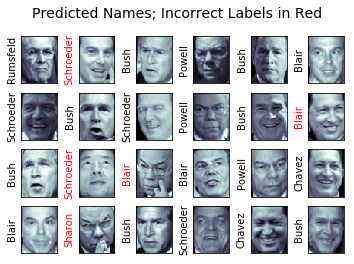

In [7]:
#4. 结果预测
import matplotlib.pyplot as plt

model = grid.best_estimator_
yfit = model.predict(Xtest)
yfit.shape
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1], color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

#各项具体评估指标
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit, target_names=faces.target_names))

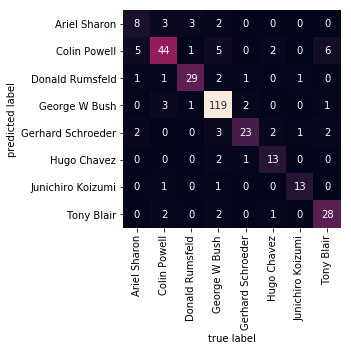

In [8]:
#混淆矩阵观察
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names, yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');